<a href="https://colab.research.google.com/github/dineshrajdhanapathyDD/Market-Analysis-using-python/blob/main/Algorithmic%20Trading%20Strategy%20Using%20MACD%20%26%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
#load the data
from google.colab import files
uploaded = files.upload() 

Saving AAPL.csv to AAPL.csv


In [8]:
#store the date into a df
df =pd.read_csv('AAPL.csv')

#set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#show the dat 
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


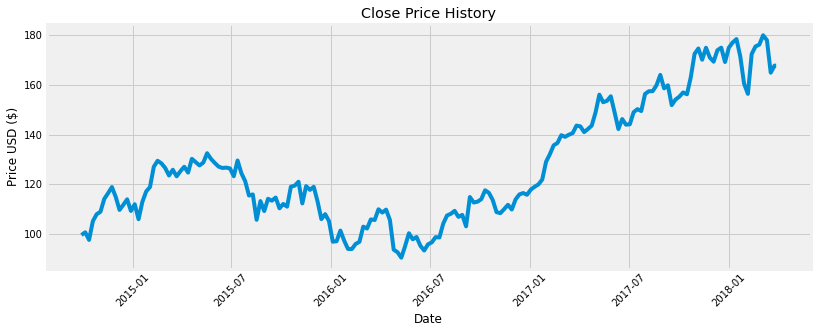

In [10]:
#visually show the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [11]:
#calcualte the MACF and signal line indicators
#calculate the short term exponential moving average(EMA)
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
#claculate the long term ema
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
#calulate the MACD line
MACD = ShortEMA-LongEMA
#cal the signal line
signal = MACD.ewm(span=9,adjust=False).mean()

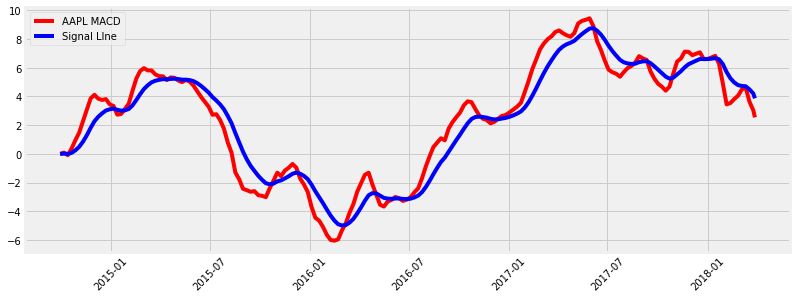

In [13]:
#plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index, MACD, label='AAPL MACD', color= 'red')
plt.plot(df.index, signal, label='Signal LIne', color= 'blue')
plt.xticks(rotation =45)
plt.legend(loc='upper left')
plt.show()

In [14]:

#create new column for the data
df['MACD'] = MACD
df['Signal Line'] =signal
#show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0.000000,0.000000
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.088547,0.017709
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-0.087191,-0.003271
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,0.378396,0.073063
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,0.960626,0.250576
...,...,...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700,4.490403,4.731596
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500,4.624384,4.710154
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700,3.633237,4.494770
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400,3.041845,4.204185


In [29]:
#create a fn to signal when to buy aand sell an asset
def buy_sell(signal):
  Buy = []
  Sell =[]
  flag=-1

  for i in range (0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag !=1:    
        Buy.append(signal['Close'][i])
        flag =1
      else:
        Buy.append(np.nan)
          
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag !=0:
        Sell.append(signal['Close'][i])
        flag =0
      else:
        Sell.append(np.nan)
              
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return(Buy, Sell)


In [30]:
#create buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

#show
df


,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0.000000,0.000000,NaN,NaN
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.088547,0.017709,100.730003,NaN
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-0.087191,-0.003271,NaN,97.669998
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,0.378396,0.073063,105.220001,NaN
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,0.960626,0.250576,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700,4.490403,4.731596,NaN,NaN
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500,4.624384,4.710154,NaN,NaN
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700,3.633237,4.494770,NaN,NaN
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400,3.041845,4.204185,NaN,NaN


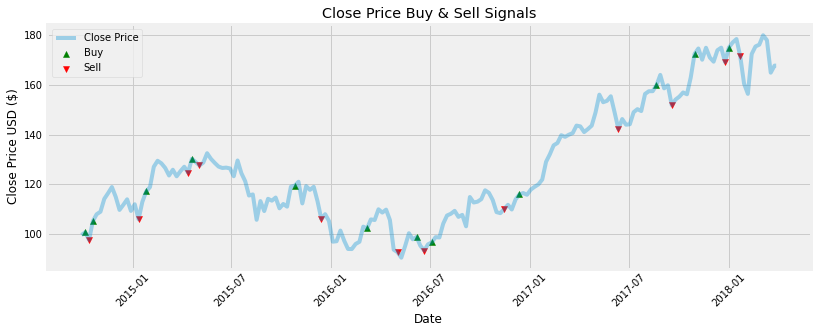

In [31]:
#visually show the stock buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha =1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha =1)
plt.plot(df['Close'], label='Close Price', alpha =0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc ='upper left')
plt.show()